<a href="https://colab.research.google.com/github/MaryamCodeHub/Shell.ai-Hackathon-2025/blob/main/Shell_ai_Hackathon_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#   UPLOAD DATASET
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


In [6]:
#   IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#   LOADING DATA

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("✅ Data loaded successfully!")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}\n")

train.columns

✅ Data loaded successfully!
Train shape: (2000, 65)
Test shape: (500, 56)



Index(['Component1_fraction', 'Component2_fraction', 'Component3_fraction',
       'Component4_fraction', 'Component5_fraction', 'Component1_Property1',
       'Component2_Property1', 'Component3_Property1', 'Component4_Property1',
       'Component5_Property1', 'Component1_Property2', 'Component2_Property2',
       'Component3_Property2', 'Component4_Property2', 'Component5_Property2',
       'Component1_Property3', 'Component2_Property3', 'Component3_Property3',
       'Component4_Property3', 'Component5_Property3', 'Component1_Property4',
       'Component2_Property4', 'Component3_Property4', 'Component4_Property4',
       'Component5_Property4', 'Component1_Property5', 'Component2_Property5',
       'Component3_Property5', 'Component4_Property5', 'Component5_Property5',
       'Component1_Property6', 'Component2_Property6', 'Component3_Property6',
       'Component4_Property6', 'Component5_Property6', 'Component1_Property7',
       'Component2_Property7', 'Component3_Property7', 'C

In [9]:
#   CHECKING FOR MISSING VALUES

print("🔍 Checking missing values in training data:")
print(train.isnull().sum())
print("\n🔍 Checking missing values in test data:")
print(test.isnull().sum())

print("\nTotal missing values in train data:", train.isnull().sum().sum())
print("Total missing values in test data:", test.isnull().sum().sum())

if train.isnull().sum().sum() == 0 and test.isnull().sum().sum() == 0:
    print("\n✅ No missing values found — data is clean!")
else:
    print("\n⚠️ Missing values found — filling with mean.")
    train.fillna(train.mean(), inplace=True)
    test.fillna(test.mean(), inplace=True)

🔍 Checking missing values in training data:
Component1_fraction    0
Component2_fraction    0
Component3_fraction    0
Component4_fraction    0
Component5_fraction    0
                      ..
BlendProperty6         0
BlendProperty7         0
BlendProperty8         0
BlendProperty9         0
BlendProperty10        0
Length: 65, dtype: int64

🔍 Checking missing values in test data:
ID                       0
Component1_fraction      0
Component2_fraction      0
Component3_fraction      0
Component4_fraction      0
Component5_fraction      0
Component1_Property1     0
Component2_Property1     0
Component3_Property1     0
Component4_Property1     0
Component5_Property1     0
Component1_Property2     0
Component2_Property2     0
Component3_Property2     0
Component4_Property2     0
Component5_Property2     0
Component1_Property3     0
Component2_Property3     0
Component3_Property3     0
Component4_Property3     0
Component5_Property3     0
Component1_Property4     0
Component2_Property4 

In [11]:
#   DEFINING FEATURES (X) AND TARGETS (y)
target_cols = [f'BlendProperty{i}' for i in range(1, 11)]  # all 10 target columns
y = train[target_cols]
X = train.drop(columns=target_cols)

if 'ID' in test.columns:
    test_features = test.drop(columns=['ID'])
else:
    test_features = test.copy()

In [12]:
#   SCALING FEATURES

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_features)

In [13]:
#   TRAIN / VALIDATION SPLIT

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:

#   TRAINING RANDOM FOREST

print("\n🌲 Training Random Forest...")
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print(f"✅ Random Forest RMSE: {rf_rmse:.4f}")


🌲 Training Random Forest...
✅ Random Forest RMSE: 0.5303


In [15]:
#     TRAINING XGBOOST

print("\n⚡ Training XGBoost...")
xgb = XGBRegressor(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
print(f"✅ XGBoost RMSE: {xgb_rmse:.4f}")


⚡ Training XGBoost...
✅ XGBoost RMSE: 0.2504


In [16]:
#   CHOOSING THE BETTER MODEL

if xgb_rmse < rf_rmse:
    best_model = xgb
    model_name = "XGBoost"
    print("\n🚀 XGBoost performed better and will be used for final prediction!")
else:
    best_model = rf
    model_name = "Random Forest"
    print("\n🚀 Random Forest performed better and will be used for final prediction!")


🚀 XGBoost performed better and will be used for final prediction!


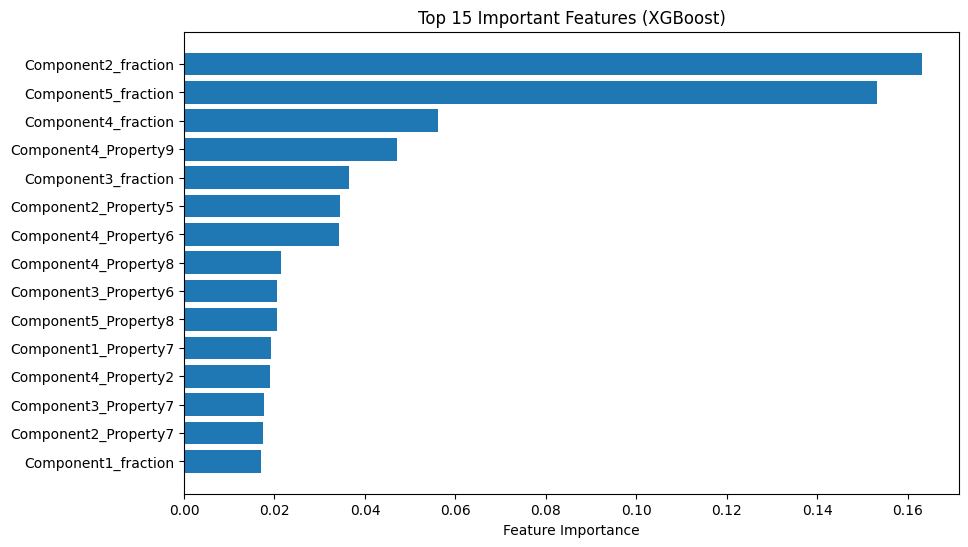

In [19]:
#   FEATURE IMPORTANCE (XGBoost)

plt.figure(figsize=(10, 6))
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15  # change if you want more/less features
plt.barh(range(top_n), importances[indices][:top_n][::-1])
plt.yticks(range(top_n), np.array(X.columns)[indices][:top_n][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (XGBoost)")
plt.show()

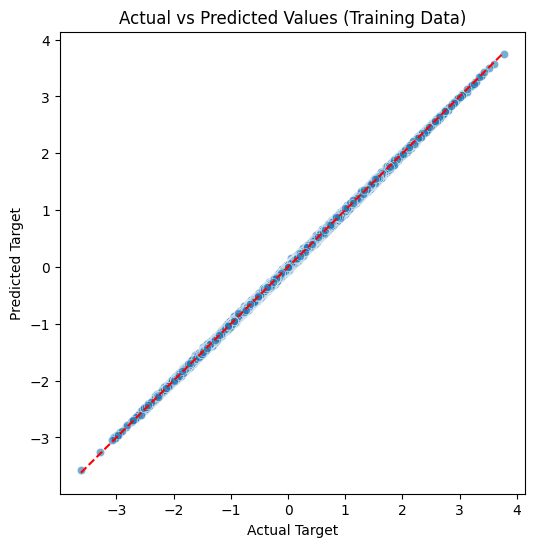

In [20]:
#   ACTUAL VS PREDICTED (Training Data)

y_train_pred = best_model.predict(X_train)
plt.figure(figsize=(6, 6))

# Flatten y_train and y_train_pred for plotting
sns.scatterplot(x=y_train.values.flatten(), y=y_train_pred.flatten(), alpha=0.6)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Training Data)")
plt.plot([y_train.min().min(), y_train.max().max()], [y_train.min().min(), y_train.max().max()], 'r--')  # reference line
plt.show()

In [21]:
#   FINAL PREDICTIONS ON UNSEEN TEST DATA

final_predictions = best_model.predict(X_test_scaled)
submission = pd.DataFrame(final_predictions, columns=target_cols)

if 'ID' in test.columns:
    submission.insert(0, 'ID', test['ID'])

submission.to_csv("submission.csv", index=False)
print(f"\n✅ Predictions from {model_name} saved to 'submission.csv' successfully!")



✅ Predictions from XGBoost saved to 'submission.csv' successfully!
